<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/main/15_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#! rm Colegio_Invisible -r

In [1]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git
! pip install cryptos

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 1290, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 1290 (delta 104), reused 125 (delta 83), pack-reused 1130
Receiving objects: 100% (1290/1290), 137.83 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (887/887), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


#Parallel Transaction Chains



In [2]:
from PIL import Image
import numpy as np

In [3]:
def grey_imgarr(imgarr):
  return imgarr[:,:,:3].mean(axis=2).astype('uint8')

def message_2_bit_array(message,mode=None):
    '''This function takes in a message as string, bytestring or hextring.
    If hexstring input the set mode='hex' '''
    if type(message)==bytes:
        hex_str=message.hex()
    elif (type(message)==str):
        if mode not in ('hex','hexstring'):
            hex_str=message.encode().hex()
        else:
            hex_str=message
    else:
        print('fix the input and mode')
        return None
    
    num=int('0x'+hex_str,base=16)
    byte_len=(len(hex_str)+1)//2
    bit_len=byte_len*8
    bin_str=bin(num)
    bit_list=[int(bit) for bit in bin_str[2:]]
    bit_list=[0]*(bit_len-len(bit_list))+bit_list
    bit_array=np.array(bit_list,dtype='uint8')
    return bit_array

def bit_array_2_byte_str(bit_array):
    '''Convert bit array to a bytestring'''
    bit_list=[ str(bit) for bit in bit_array]
    bin_str='0b'+(''.join(bit_list))
    num=int(bin_str,base=2)
    return num.to_bytes(len(bit_array)//8,'big')

def bit_array_2_hex_str(bit_array):  
    '''Convert a bit array to a hexstring'''
    return bit_array_2_byte_str(bit_array).hex()

def bit_array_2_str(bit_array,encoding='utf-8'):
    '''Convert a bit array to a string'''
    return bit_array_2_byte_str(bit_array).decode(encoding)

def int2bitarray(x,bit=8):
  return message_2_bit_array(hex(x)[2:],mode='hex')[:bit]

def bitarray2int(b_arr):
  ln=b_arr.shape[0]
  scales=(2**np.arange(7,-1,-1))[:ln]
  return (b_arr*scales).sum()

def imgarr2bitarray(imgarr,bit=8):
  return np.array([ int2bitarray(it,bit) for it in imgarr.reshape(-1)]).reshape(-1)

def bitarray2imgarr(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr
 
def bitarray2imgarr_scale(barrs,imgshape=(16,16),bit=2,color=1):
  lns=len(barrs.reshape(-1))
  #Bs=barrs.reshape(*imgshape,bit)
  intlst=[ bitarray2int_scale(barrs.reshape(-1)[i:i+bit]) for i in range(0,lns,bit) ]
  intarr=np.array(intlst).reshape(*imgshape,color).astype('uint8')
  return intarr

In [4]:
class bitimage():

  def __init__(self,imgpath,dims=(16,16),bit=2,color=1):
    from PIL import Image
    self.color=color
    self.bit=bit
    self.dims=list(dims)
    self.img_og=Image.open(imgpath)
    self.img_resize=self.img_og.resize(dims)
    self.grey=grey_imgarr(np.array(self.img_resize))
    self.img_grey=Image.fromarray(self.grey)
    self.bitarray=imgarr2bitarray(self.grey,bit)
    self.bitarray_color=imgarr2bitarray(np.array(self.img_resize)[:,:,:color],bit)
    self.newimg=Image.fromarray(bitarray2imgarr(self.bitarray,imgshape=dims[::-1],bit=bit,color=1).squeeze())
    self.newimg_color=Image.fromarray(bitarray2imgarr(self.bitarray_color,imgshape=dims[::-1],bit=bit,color=3).squeeze())
    self.bytestring=bit_array_2_byte_str(self.bitarray)
    self.bytestring_color=bit_array_2_byte_str(self.bitarray_color)




In [5]:
!ls Colegio_Invisible/img

Apollo_Slays_Python_1853.jpeg  hg_cry.jpeg	 PubKeyToAddr.png
asymmetric.png		       hg_drop.jpeg	 rum_0.jpeg
bab_crop.jpeg		       hg_hide.jpeg	 rum_1.jpeg
barb_1.jpeg		       hg_house.jpeg	 rum_2.jpeg
barb_2.jpeg		       hg_invite.jpeg	 rum_3.jpeg
barb_3.jpeg		       hg_rough.png	 rum_4.jpeg
barb_4.jpeg		       hg_xmas.jpeg	 rum_5.jpeg
barb_5.jpeg		       mask.png		 rum_6.jpeg
barb_6.jpeg		       mnemonic.png	 rum_7.jpeg
barb_7.jpeg		       paco.png		 rump_final.jpeg
cat.png			       peter2.png	 seed.png
chris.png		       peter3.png	 signature.png
clavis.jpeg		       peter4.png	 stego.png
colegio_invisible.jpeg	       peter.png	 symmetric.png
hd_wallet.png		       prv_pub_addr.png  zomnd.png


# Transform Image and Create Byte Encoding 

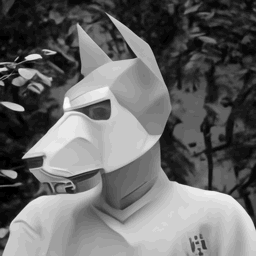

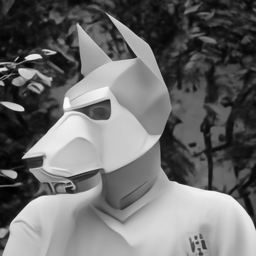

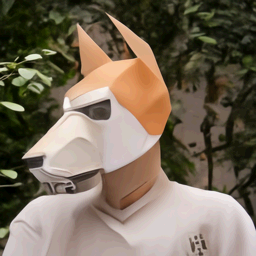

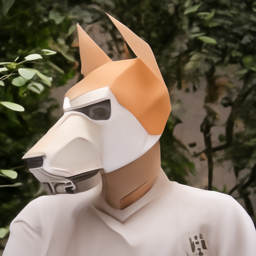

(512.0, 1536.0)

In [9]:
length=256
width=256
bit_num=5


bimg=bitimage('/content/download-10.png',dims=(length,width),bit=bit_num,color=3)
display(bimg.newimg)
display(bimg.img_grey)
display(bimg.newimg_color)
display(bimg.img_resize)
len(bimg.bytestring)/80,len(bimg.bytestring_color)/80

# Create Embedding for Blockchain

In [ ]:
length

128

In [10]:
depth=4 #depth of transaction chain

import hashlib 

message=bimg.bytestring
H=hashlib.sha256(message)

n=4*80
chunks = [message[i:i+n] for i in range(0, len(message), n)]

print(len(chunks))
print(len(chunks[-1]))

print(H.digest())

128
320
b'G\x93\x0c\x88\x9a9\xb7M\x89\xfdX+\xf6:4\xe9\xf1v\xd7\x9aGe\x1c\x8d-\x10\x99;L3\xa6l'


In [11]:
length_bytes=length.to_bytes(2,'big')
width_bytes=width.to_bytes(2,'big')
bitnum_bytes=bit_num.to_bytes(1,'big')
print(length_bytes)
print(width_bytes)
print(bitnum_bytes)

b'\x01\x00'
b'\x01\x00'
b'\x05'


In [12]:
header=b'\xc1\xdd\x00\x01\x03\x00\x00'+length_bytes+width_bytes+bitnum_bytes
text='|Dr. Doeg en Buenos Aires|'.encode() + H.digest()
print(len(header))
print(len(text))
header+text

12
58


b'\xc1\xdd\x00\x01\x03\x00\x00\x01\x00\x01\x00\x05|Dr. Doeg en Buenos Aires|G\x93\x0c\x88\x9a9\xb7M\x89\xfdX+\xf6:4\xe9\xf1v\xd7\x9aGe\x1c\x8d-\x10\x99;L3\xa6l'

In [13]:
package=[header+text]+chunks
package

[b'\xc1\xdd\x00\x01\x03\x00\x00\x01\x00\x01\x00\x05|Dr. Doeg en Buenos Aires|G\x93\x0c\x88\x9a9\xb7M\x89\xfdX+\xf6:4\xe9\xf1v\xd7\x9aGe\x1c\x8d-\x10\x99;L3\xa6l',
 b'\x10\xccs\x98\xa51\x8es\x9c\xa2\x08B\x10\x84B\x18\xc4!\x08B\x10\x841\x8cB\x10\xc8B\x10\x84!\x08A\x8c\x84!\x08A\x8cc\x19\x081\x04!\x08B\x10\x84!\x08B\x10\x84!\x08D2\x9c\xe7BT\xa5)JJT\xa5%\x061HB\x14\x83\x10\x88S\x14\x82\x08D!\x08B\x10\x82!\x0cc!\nR\x90\x83\x18\xc4!\x0cb\x10\xc8B\x14\xc6)Ld%IA\xcaB\x14\xa5)L\x95\xa8\xe6)\n\x84\xa0\xe5 \xc4!\x8cc\x19\x08A\x8cB\x10\x86B\x98\xe8A\xces\x14\x83\x18\xc61\x8cc\x10\x86!\x04C\x18\xc4\x10\x88C\x10\xcac\x18\xa69\xces\x9c\x81\x08\x84 \x84"\x10\x84!\x08B\x10\x862\x0cb\x19\x08R\x10\x84 \xc61\x8c\x84!\x061\x8cc!J1\x04!\x08B\x10\x84!\x08D!\x04!\x08D2\x98\xa5:R\x94\xa5)J\x96\xb5\xa9H9HB\x10\x83\x10\x86R\x94\x82\x08D!\x08B\x10\x82\x11\x0cd!LR\x90\x83\x18\x84!\x0cc\x18\xc61\x90\xa5)\x08S\xa5JJ\x0cB\x14\xa5)\x90\xc6\xa9\x071\x08t\x9c\xc5!H1\x8cc\x18\xc61\x08A\x08\x86B\x9c\xe79\xcec\x14\x83\x19\

In [14]:
! pip install eciespy eth_keys cryptos qrcode base58 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 1.3 MB 8.1 MB/s 
     |████████████████████████████████| 2.3 MB 43.2 MB/s 
     |████████████████████████████████| 105 kB 51.9 MB/s 
     |████████████████████████████████| 481 kB 51.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1236687 sha256=f9cd7eebae1fb3d883d9d257d17911e01209ab93aae5ba313a3c289205a05620
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for qrcode: filename=qrcode-7.3.1-py3-none-any.whl size=40402 sha256=0c3849e9f9679a841fa6a1699bbf9fd079940b1e92828ac3783405a9975040c2
  Stored in directory: /root/.cache/pip/wheels/93/d7/39/a4111be2cfb8e679938aa671a37888b6afb1f9e7d748e94492
Successfully built cytoolz qrcode


In [15]:
import pandas as pd
from cryptos.py3specials import safe_hexlify, from_string_to_bytes, from_int_to_byte, from_string_to_bytes
from cryptos import serialize,deserialize

import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()

def only_conf(utxos):
    return [utxo for utxo in utxos
            if doge.fetchtx(utxo['output'].split(':')[0])['confirmations']>0]

def mk_opreturn(msg, rawtx=None, json=0):
    
    def op_push(data):
        if type(data) == bytes:
            bytedata=data
        else:
            bytedata=data.encode()
        import struct
        if len(data) < 0x4c:
            return from_int_to_byte(len(bytedata)) + bytedata
        elif len(data) < 0xff:
            return from_int_to_byte(76) + struct.pack('<B', len(bytedata)) + bytedata
        elif len(data) < 0xffff:
            return from_int_to_byte(77) + struct.pack('<H', len(bytedata)) + bytedata
        elif len(data) < 0xffffffff:
            return from_int_to_byte(78) + struct.pack('<I', len(bytedata)) + bytedata
        else: raise Exception("Input data error. Rawtx must be hex chars" \
                            + "0xffffffff > len(data) > 0")

    orhex = safe_hexlify(b'\x6a' + op_push(msg))
    orjson = {'script' : orhex, 'value' : 0}
    if rawtx is not None:
        try:
            txo = deserialize(rawtx)
            if not 'outs' in txo.keys(): raise Exception("OP_Return cannot be the sole output!")
            txo['outs'].append(orjson)
            newrawtx = serialize(txo)
            return newrawtx
        except Exception as E:
            print(E)
            print(type(E))
            raise Exception("Raw Tx Error!")
    return orhex if not json else orjson

# Load Keys and Addresses

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
! cp drive/MyDrive/cinv/llaves.zip llaves.zip 
! unzip llaves.zip

Archive:  llaves.zip
   creating: llaves/
 extracting: llaves/mi_addr.bin      
 extracting: llaves/mi_addr.png      
 extracting: llaves/mi_pub.bin       
 extracting: llaves/mi_prv.enc       


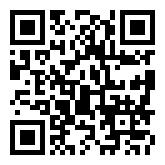

'0x7c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5'

'D6zKNnkupqRbkB9p5rwix8QiobQWJazjyX'

In [18]:
import IPython.display
qr=IPython.display.Image('llaves/mi_addr.png')

privKey=import_privKey('llaves/mi_prv.enc','')
pub=import_pubKey('llaves/mi_pub.bin').to_hex()
addr=import_addr('llaves/mi_addr.bin')

display(qr)
display(pub)
display(addr)

# Inspect Outputs

In [19]:
doge=cryptos.Doge()
#addy=doge.privtoaddr(privkeyhex)
doge_unspents=only_conf( doge.unspent(addr) )
doge_unspent_total=sum([unspent['value'] for unspent in doge_unspents])
doge_unspent_total/10**8

1158.917069

# Create UTXO set for Enscription

In [20]:
len(package),len(package[0]),len(package[1]),len(package[-1])

(129, 70, 320, 320)

In [21]:
tip=6_95_850_003
available=doge_unspent_total-tip
n=len(package)
gift=int(available/n)
outputs=[{'value':gift , 'address': addr} for i in range(len(package))]
setup_tx=doge.mktx(doge_unspents,outputs)
gift/100_000_000

8.92991138

In [22]:
doge.signall(setup_tx,privKey.to_hex()[2:])

'0100000002d318a93b55e1461c42539e0545f6c1526473db3d08a8db0689e789e140113e9a000000008a4730440220247f74b1f2fcef4725cf671b82525636f469c0f858f289e096501d33d46a13ac0220133f5012086b812e70d2e3a18b397fea81d420a9e60901f57519d3178503f9d00141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffffdbfa5951530eb04dcd19b2d7a233201d3441491d48741dc063c9b8ecefd126ff000000008a47304402200d0508725e16a0d0efb2a1e834e05bd53e925fff7cf24ec9cae47a3a9557ee4202204e918480694abe8c3865700f4831284b561588bd724fc2293c622d34390628230141047c88e9a4df6e9f45656c10bf66f28e28be235a15b64820b254f1b9eb2738314e6769f5c94da0c7640ffe76dcffca053b07a0804cd53a1c51ad03bfe0133ce8c5ffffffff81a2f63935000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88aca2f63935000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88aca2f63935000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88aca2f63935000000001976a914144739367df0ff8d1c61d03704298d49cf93ef3f88a

In [23]:
tip/(len(cryptos.serialize(setup_tx))/2)/100000

1.463714772822886

In [24]:
funding=doge.pushtx(cryptos.serialize(setup_tx))
funding

{'data': {'network': 'DOGE',
  'txid': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d'},
 'status': 'success'}

In [81]:
doge.fetchtx(funding['data']['txid'])['confirmations']

38

In [82]:
#UTXO set
sparkle_unspents=doge.unspent(addr) 
len(sparkle_unspents)

100

In [ ]:
sparkle_unspents

In [84]:

len(sparkle_unspents),len(package)

(100, 129)

In [83]:
data_and_utxo=zip(package,sparkle_unspents)

In [43]:
class Cadena():

  def __init__(self,prvkey,data,utxo_dct,tip):
    self.data=data
    self.doge=cryptos.Doge()
    self.clip=[self.data[i:i+80] for i in range(0,len(self.data),80) ]
    self.og_len=len(self.clip)
    self.state='CONF'
    self.utxo=utxo_dct
    self.head_utxo=self.utxo
    self.txn_ids=[self.utxo['output'].split(':')[0]]
    self.prv=prvkey
    self.addr=self.doge.privtoaddr(self.prv)
    self.tip=tip
    self.index=0

  def make_tx(self):
    tx = self.doge.mktx([self.head_utxo],[ {'value':self.head_utxo['value']-self.tip , 'address': self.addr}])
    doge_inscribed_serial_tx=mk_opreturn( self.clip[self.index] , cryptos.serialize(tx))
    doge_inscribed_tx=cryptos.deserialize(doge_inscribed_serial_tx)
    self.signed_inscribed_tx=self.doge.signall(doge_inscribed_tx,self.prv)
    self.state='READY'
  
  def broadcast(self):
    self.cast=self.doge.pushtx(self.signed_inscribed_tx)
    cast_txid=self.cast['data']['txid']
    self.txn_ids.append(cast_txid)
    self.head_utxo={'output':cast_txid+':0' ,'value':self.head_utxo['value']-self.tip }
    self.index=self.index+1
    self.state='SENT'

  def update(self):
    if self.doge.fetchtx(self.head_utxo['output'].split(':')[0])['confirmations']:
      self.state='CONF'
      if self.index==self.og_len:
        self.state='DONE'
    

In [92]:
sparkle_unspents[:29]

[{'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:100',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:101',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:102',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:103',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:104',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:105',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:106',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:107',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:108',
  'value': 892991138},
 {'output': 'aa0c3ea6b38b2238725df245

In [80]:
len(package)

129

In [88]:
len(package[100:])

29

In [93]:
cadenas=[ Cadena(privKey.to_hex()[2:],*datum_utxo,100_000_000)for datum_utxo in zip(package[100:],sparkle_unspents[:29]) ]

In [94]:
import time

height=doge.current_block_height()-1
print(height)
while True:
  check_height=doge.current_block_height()
  if check_height>height:
    height=check_height
    print(height)
    [cad.make_tx() for cad in cadenas if cad.state=='CONF'];
    [cad.broadcast() for cad in cadenas if cad.state=='READY'];
    [cad.update() for cad in cadenas if cad.state=='SENT'];
    [cad.make_tx() for cad in cadenas if cad.state=='CONF'];
    [cad.broadcast() for cad in cadenas if cad.state=='READY'];
    print([cad.state for cad in cadenas])
    if all([cad.state=='DONE' for cad in cadenas]):
      break
  time.sleep(10)

4289657
4289658
['SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT']
4289659
['SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT']
4289660
['SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT']
4289661
['SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT', 'SENT']
4289663
['SENT', 'SENT', 'SE

In [48]:
cadenas[1].utxo

{'output': 'aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d:1',
 'value': 892991138}

In [49]:
cadenas[0].head_utxo

{'output': '4031dfd921fa5db207159d3cc171147e8916b7923f8e2256d9eff88f88b6d59e:0',
 'value': 792991138}

# Everything is Retrievable From the TX Hash of Header Transaction 



Use the UTXO set transactions

The first is greyscale. The second is color. They are both super parallel, meaning there is no series processing of the data.

The third is multi strand

The fourth is single strand

```
c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b

a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9

9e42c7ab6f47dadc0c36d22fb20f69c9db0daa5c719cd8ff83c8ecf250efa519

6de5b84940f73653196800c747f3a6f86752e4dcc5ccbb3fbc81fcb2d20e1672

aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d
```

# Automate Reading From Dogecoin Blockchain

In [50]:
def get_output_spend_txns(txn_ident):
  import requests
  import json
  r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{txn_ident}')
  return [out['spent']['txid'] for out in json.loads(r.text)['data']['outputs']]

def get_op_return(txn_ident):
  import requests
  import json
  r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{txn_ident}')
  outs=json.loads(r.text)['data']['outputs']
  asm=outs[-1]['script_asm']
  return (asm[10:] if 'OP_RETURN' in asm else None),outs[0]['spent']['txid'] if outs[0]['spent'] else None

def get_op_returns(tx_head,prefix=''):
  op_ret,next_txn=get_op_return(tx_head)
  if (op_ret and next_txn):
    return get_op_returns(next_txn,prefix+op_ret)
  if op_ret==None:
    return prefix
  else:
    return prefix+op_ret

def read_cadenas(txn_ident):
  datalist=[get_op_returns(txn) for txn in get_output_spend_txns(txn_ident)]
  return datalist[0],b''.join([bytes.fromhex(x) for x in datalist[1:] ])

In [65]:
def get_output_spend_txns(txn_ident):
  import requests
  import json
  r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{txn_ident}')
  return [out['spent']['txid'] for out in json.loads(r.text)['data']['outputs']]

def get_op_return(txn_ident):
  import requests
  import json
  r = requests.get(f'https://sochain.com/api/v2/tx/DOGE/{txn_ident}')
  outs=json.loads(r.text)['data']['outputs']
  asm=outs[-1]['script_asm']
  return (asm[10:] if 'OP_RETURN' in asm else None),outs[0]['spent']['txid'] if outs[0]['spent'] else None

def get_op_returns(tx_head,prefix=''):
  import time
  time.sleep(0.25)
  op_ret,next_txn=get_op_return(tx_head)
  if (op_ret and next_txn):
    return get_op_returns(next_txn,prefix+op_ret)
  if op_ret==None:
    return prefix
  else:
    return prefix+op_ret

def read_cadenas(txn_ident):
  datalist=[get_op_returns(txn) for txn in get_output_spend_txns(txn_ident)]
  return datalist[0],b''.join([bytes.fromhex(x) for x in datalist[1:] ])

In [ ]:
print(bytes.fromhex(get_op_returns('6de5b84940f73653196800c747f3a6f86752e4dcc5ccbb3fbc81fcb2d20e1672')).decode('latin'))

Blue Monday

How does it feel
When you treat me like you do
your hands upon me
And told me who you are?
I thought I was mistaken
hought I heard your words
Tell me, how do I feel?
?
Those who came before me
Lived through their vocations
 completion
They will turn away no more
And I still find it so hard
hat I need to say
But I'm quite sure that you'll tell me
eel today
I see a ship in the harbor
I can and shall obey
or your misfortunes
I'd be a heavenly person today
ken
And I thought I heard you speak
Tell me how do I feel?
should I feel?
Now I stand here waiting
I thought I told you to leave me
WhiÝ
le I walked down to the beach
Tell me, how does it feel
s cold?
How does it feel?
How does it feel?
How does it feel?
I told you to leave me
While I walked down to the beach
 feel
When your heart grows cold


In [ ]:
(head_a01,bytes_a01)=read_cadenas('a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9')

In [55]:
def read_image_chain(txn_id):
  (hex_header,image_bytes)=read_cadenas(txn_id)
  C={0:1,1:3}[int(hex_header[12:14],16)]
  L=int(hex_header[14:18],16)
  W=int(hex_header[18:22],16)
  B=int(hex_header[22:24],16)
  print(C,L,W,B)
  sparkle_bits=message_2_bit_array(image_bytes,mode=None)
  spark_array=bitarray2imgarr(sparkle_bits,imgshape=(W,L),bit=B,color=C).squeeze()
  return hex_header,spark_array

3 64 64 5


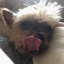

In [ ]:
(hdr_a01,ar_a01)=read_image_chain('a01e8625d653f4a8686b5b9e20ca653e59ebcd8bf2ca2a7b8370fdc52417f7b9')
Image.fromarray(ar_a01)

In [ ]:
bytes.fromhex(hdr_a01[24:]).decode()

'Peter Bea'

1 64 64 5


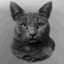

In [ ]:
hdr_c15,ar_c15=read_image_chain('c1542c10399a09a5471799133c472a6652d5cb3b7b421e1a7e80e2039f5b393b')
Image.fromarray(ar_c15)

In [ ]:
#bytes.fromhex(hdr_c15[24:]).decode()

3 128 64 5


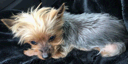

In [57]:
hdr_9e4,ar_9e4=read_image_chain('9e42c7ab6f47dadc0c36d22fb20f69c9db0daa5c719cd8ff83c8ecf250efa519')
Image.fromarray(ar_9e4)

In [ ]:
bytes.fromhex(hdr_9e4)

b'\xc1\xdd\x00\x01\x03\xff\x01\x00\x80\x00@\x05|This was Peter on her blanket during a ride to the country|\xf0\x9f\x90\xb4\xf0\x9f\x90\xb6\x08\xbb\xbe\x8a\x13\x9c,\xa1\xf4?\xffI\xack\xb2"e\x84h\xe2)\xc3O\x13\x80\xcc\x91\x0eO\x1a\xa4P'

In [ ]:
bytes.fromhex(hdr_9e4[24:-64]).decode()

'|This was Peter on her blanket during a ride to the country|🐴🐶'

1 256 256 5


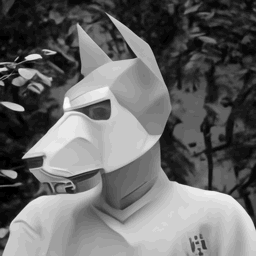

In [95]:
(hdr_aa0,ar_aa0)=read_image_chain('aa0c3ea6b38b2238725df2457eb328bbebd7d91ac5241c24de8ea11616c2bb6d')
Image.fromarray(ar_aa0)

In [98]:
bytes.fromhex(hdr_aa0[24:]).decode('latin')

'|Dr. Doeg en Buenos Aires|G\x93\x0c\x88\x9a9·M\x89ýX+ö:4éñv×\x9aGe\x1c\x8d-\x10\x99;L3¦l'